# The Generalized Logistic Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact

from yeastdnnexplorer.ml_models.GeneralizedLogisticModel import sigmoid, GeneralizedLogisticModel

## The Sigmoid Function

The `sigmoid()` function takes the following arguments:

- The observations as a model matrix, where the first column is a constant vector
- Upper Asymptote: The upper bound of the sigmoid curve.
- Lower Asymptote: The lower bound of the sigmoid curve.
- Inflection Point: Controls the curve's steepest point.
- Coefficients (B): The coefficients of the linear combination of input variables
that will control the shape of the sigmoid curve.

    Single Variable Design Matrix: This includes the intercept and a single independent variable X1X1​.
    Two Variable Design Matrix: This includes the intercept and two independent variables X1X1​ and X2X2​.
    Two Variable + Interaction Design Matrix: This includes the intercept, two independent variables X1X1​, X2X2​, and their interaction term X1×X2X1​×X2​.

For each case, we compute the output YY using the sigmoid function.

In [2]:
# Interactive function to update the plot
def update_plot(upper_asymptote, lower_asymptote, inflection_point, slope):
    X1 = np.linspace(0, 10, 100)
    X_single_var = np.column_stack([X1])  # No intercept column
    inflection_point = [inflection_point]  # Only one inflection point
    
    B_single_var = [slope]  # Only one coefficient for X1
    
    # Calculate Y using the sigmoid function
    Y_single_var = sigmoid(X_single_var, upper_asymptote, lower_asymptote, inflection_point, B_single_var)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(X1, Y_single_var, label="Sigmoid Curve")
    plt.ylim(-2.1, 2.1)
    plt.title("Interactive Sigmoid Curve")
    plt.xlabel("X1")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders for each parameter
interact(
    update_plot,
    upper_asymptote=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    lower_asymptote=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
    inflection_point=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
    slope=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1)
)


interactive(children=(FloatSlider(value=1.0, description='upper_asymptote', max=2.0), FloatSlider(value=0.0, d…

<function __main__.update_plot(upper_asymptote, lower_asymptote, inflection_point, slope)>

In [3]:
# Interactive function to update the 3D surface plot
def update_3d_plot(upper_asymptote, lower_asymptote, inflection_point_X1, inflection_point_X2, slope_X1, slope_X2, elev, azim):
    # Define the two variables
    X1 = np.linspace(0, 10, 100)
    X2 = np.linspace(0, 10, 100)
    
    # Inflection points and slopes for two variables
    inflection_point = [inflection_point_X1, inflection_point_X2]
    B_two_vars = [slope_X1, slope_X2]
    
    # Create a meshgrid for X1 and X2
    X1_grid, X2_grid = np.meshgrid(X1, X2)
    
    # Compute Y (the output) for each combination of X1 and X2 on the grid
    Y_grid = sigmoid(np.column_stack([X1_grid.ravel(), X2_grid.ravel()]), 
                     upper_asymptote, lower_asymptote, inflection_point, B_two_vars).reshape(X1_grid.shape)
    
    # Create the 3D surface plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface using the meshgrid for X1, X2, and the corresponding Y values
    ax.plot_surface(X1_grid, X2_grid, Y_grid, cmap="viridis")
    
    ax.set_title('Interactive 3D Surface Plot for Two Variables')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    
    # Rotate the plot to look more directly at the X1 axis
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

# Create interactive sliders for each parameter
interact(
    update_3d_plot,
    upper_asymptote=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    lower_asymptote=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
    inflection_point_X1=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
    inflection_point_X2=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    slope_X1=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1),
    slope_X2=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1),
    elev = widgets.IntSlider(min=0, max=180, step=1, value=18),
    azim = widgets.IntSlider(min=0, max=360, step=1, value=139)
)

interactive(children=(FloatSlider(value=1.0, description='upper_asymptote', max=2.0), FloatSlider(value=0.0, d…

<function __main__.update_3d_plot(upper_asymptote, lower_asymptote, inflection_point_X1, inflection_point_X2, slope_X1, slope_X2, elev, azim)>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact


# Interactive function to update the 3D surface plot with interaction term
def update_3d_plot(upper_asymptote, lower_asymptote, inflection_point_X1, inflection_point_X2, slope_X1, slope_X2, interaction_coeff, elev, azim):
    # Define the two variables
    X1 = np.linspace(0, 10, 100)
    X2 = np.linspace(0, 10, 100)
    
    # Design matrix with interaction term (X1 + X2 + X1 * X2)
    X1_grid, X2_grid = np.meshgrid(X1, X2)
    X_two_vars_interaction = np.column_stack([X1_grid.ravel(), X2_grid.ravel(), (X1_grid * X2_grid).ravel()])
    
    # Inflection points and slopes for two variables + interaction term
    inflection_point = [inflection_point_X1, inflection_point_X2, 0]  # No inflection for interaction term
    B_two_vars_interaction = [slope_X1, slope_X2, interaction_coeff]
    
    # Compute Y (the output) for each combination of X1 and X2 on the grid
    Y_grid = sigmoid(X_two_vars_interaction, 
                     upper_asymptote, lower_asymptote, inflection_point, B_two_vars_interaction).reshape(X1_grid.shape)
    
    # Create the 3D surface plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface using the meshgrid for X1, X2, and the corresponding Y values
    ax.plot_surface(X1_grid, X2_grid, Y_grid, cmap="viridis")
    
    ax.set_title('Interactive 3D Surface Plot with Interaction Term')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    
    # Rotate the plot
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

# Create interactive sliders for each parameter
interact(
    update_3d_plot,
    upper_asymptote=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    lower_asymptote=widgets.FloatSlider(min=-2, max=2, step=0.1, value=0),
    inflection_point_X1=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
    inflection_point_X2=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    slope_X1=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1),
    slope_X2=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1),
    interaction_coeff=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
    elev=widgets.IntSlider(min=0, max=180, step=1, value=18),
    azim=widgets.IntSlider(min=0, max=360, step=1, value=139)
)


interactive(children=(FloatSlider(value=1.0, description='upper_asymptote', max=2.0), FloatSlider(value=0.0, d…

<function __main__.update_3d_plot(upper_asymptote, lower_asymptote, inflection_point_X1, inflection_point_X2, slope_X1, slope_X2, interaction_coeff, elev, azim)>

## Fitting the Sigmoid Model to Data

The `GeneralizedLogisticModel` is used to fit the sigmoid parameters to
data

### Single Variable Example

Input y shape: (100,)
Set X shape: (100, 1)


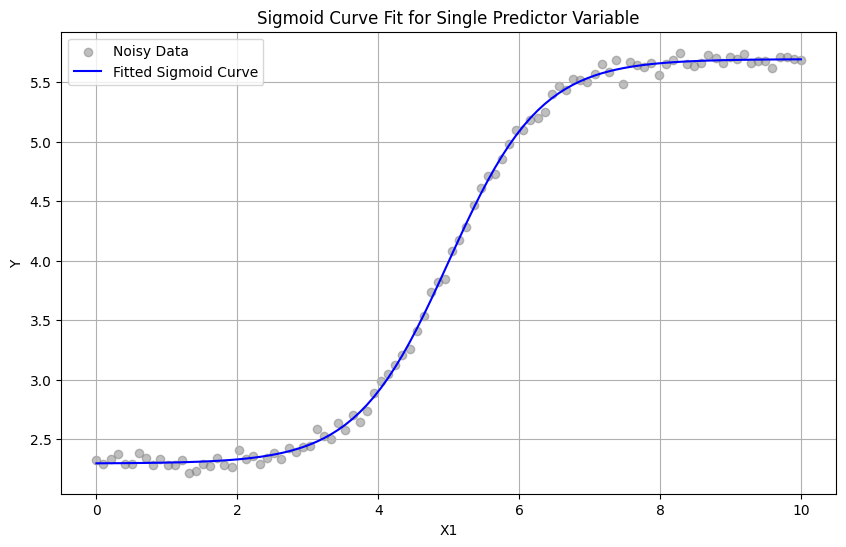

In [5]:
glm_single_variable = GeneralizedLogisticModel()

# Generate sample data
np.random.seed(42)
X1 = np.linspace(0, 10, 100)
# True sigmoid parameters
true_upper_asymptote = 5.7
true_lower_asymptote = 2.3
true_inflection_point = 5.0
true_slope = 1.5

# Generate Y data using the true sigmoid function
Y_true = sigmoid(
    X1[:, np.newaxis],
    true_upper_asymptote,
    true_lower_asymptote,
    np.array([true_inflection_point]),
    np.array([true_slope]))

# Add some noise to the Y values
noise = 0.05 * np.random.randn(len(X1))
Y_noisy = Y_true.ravel() + noise

# Fit the model to the noisy data
X_single_var = X1[:, np.newaxis]

glm_single_variable.model(Y_noisy, X_single_var)

glm_single_variable.fit()

Y_fitted = glm_single_variable.predict(X_single_var)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X1, Y_noisy, color="gray", alpha=0.5, label="Noisy Data")
plt.plot(X1, Y_fitted, color="blue", label="Fitted Sigmoid Curve")
plt.title("Sigmoid Curve Fit for Single Predictor Variable")
plt.xlabel("X1")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

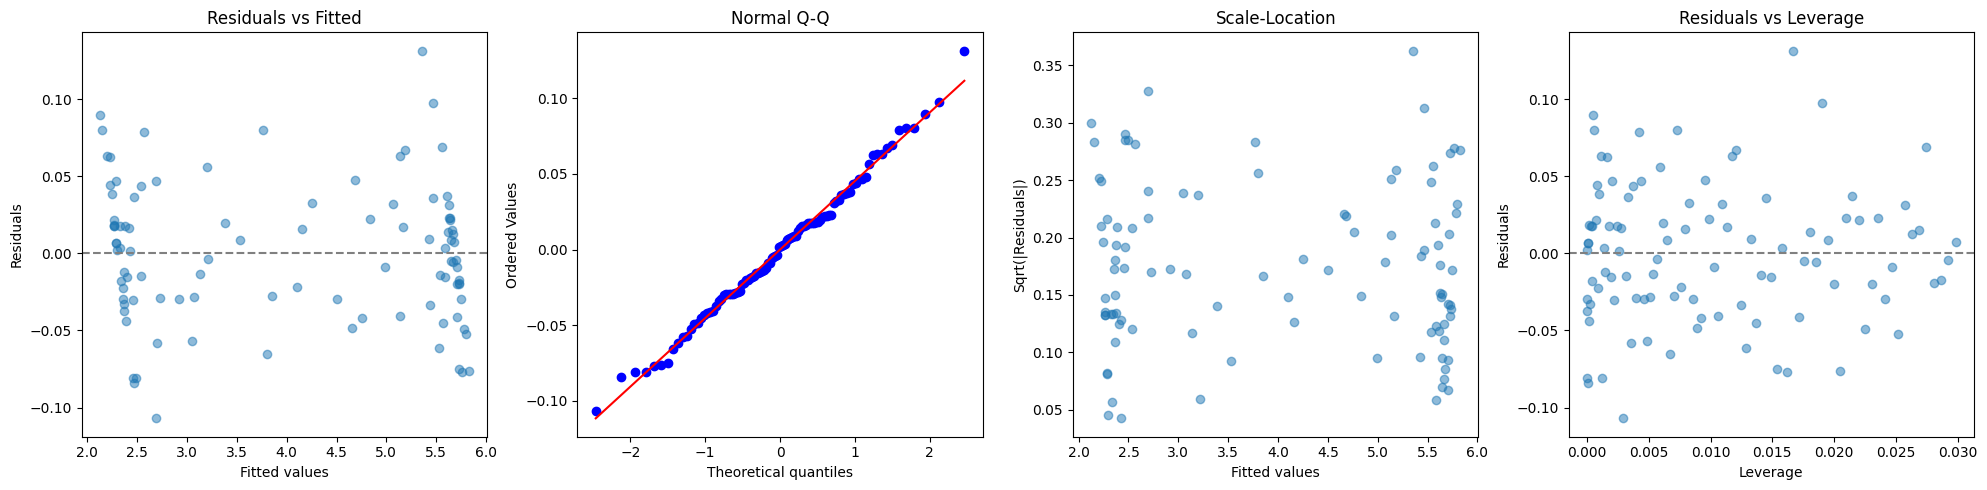

In [6]:
glm_single_variable.plot()

In [7]:
glm_single_variable.summary()


Generalized Logistic Model Summary

|                    |   Estimate |   Std. Error |   t value |     Pr(>|t|) |
|:-------------------|-----------:|-------------:|----------:|-------------:|
| upper_asymptote    |     5.6954 |       0.009  |  635.106  |            0 |
| lower_asymptote    |     2.2954 |       0.009  |  256.134  |            0 |
| inflection_point_0 |     5.0018 |       0.0108 |  464.396  |            0 |
| coef_0             |     1.5278 |       0.0224 |   68.3152 |            0 |

Residual standard error: 0.0455 on 96 degrees of freedom
R-squared: 0.9991, Adjusted R-squared: 0.9990
F-statistic: 34511.3430 on 3 and 96 DF, p-value: 1.11e-16


### Multivariate Example

Input y shape: (100,)
Set X shape: (100, 2)


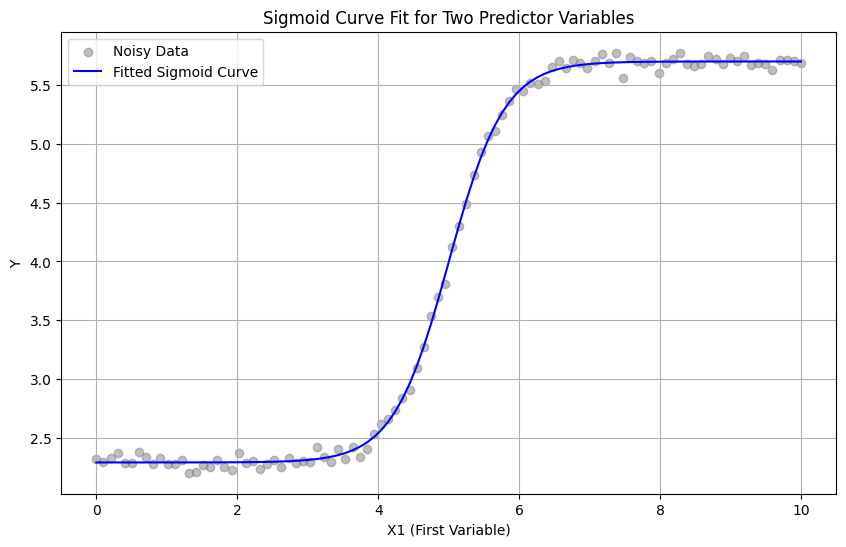

In [8]:
glm_two_variable = GeneralizedLogisticModel()

# Generate sample data
np.random.seed(42)
X1 = np.linspace(0, 10, 100)
X2 = np.linspace(5, 15, 100)

# True sigmoid parameters
true_upper_asymptote = 5.7
true_lower_asymptote = 2.3
true_inflection_point = np.array([5.0, 10.0])  # Inflection points for both variables
true_slope = np.array([2, 0.5])  # Slopes for both variables

# Stack X1 and X2 to form a design matrix with two variables
X_two_vars = np.column_stack([X1, X2])

# Generate Y data using the true sigmoid function
Y_true = sigmoid(
    X_two_vars,
    true_upper_asymptote,
    true_lower_asymptote,
    true_inflection_point,
    true_slope
)

# Add some noise to the Y values
noise = 0.05 * np.random.randn(len(X1))
Y_noisy = Y_true.ravel() + noise

# Fit the model to the noisy data
glm_two_variable.model(Y_noisy, X_two_vars)
bounds = (
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],  # lower bounds: [lower_asymptote, upper_asymptote, inflection points_0, inflection_point_1, coefficient_0, coefficient_1]
    [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]  # upper bounds
)
glm_two_variable.fit(method="trf")

# Predict using the fitted model
Y_fitted = glm_two_variable.predict(X_two_vars)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X1, Y_noisy, color="gray", alpha=0.5, label="Noisy Data")
plt.plot(X1, Y_fitted, color="blue", label="Fitted Sigmoid Curve")
plt.title("Sigmoid Curve Fit for Two Predictor Variables")
plt.xlabel("X1 (First Variable)")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

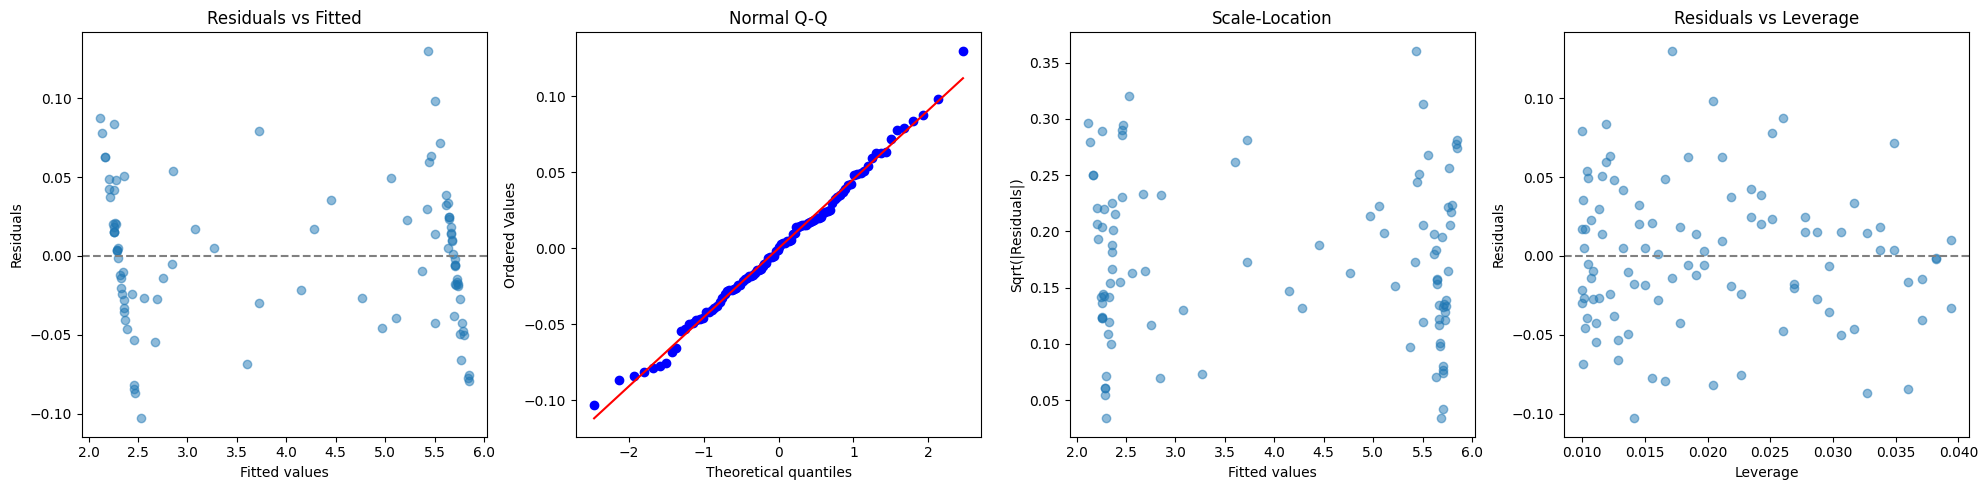

In [9]:
glm_two_variable.plot()

In [10]:
glm_two_variable.summary()


Generalized Logistic Model Summary

|                    |   Estimate |   Std. Error |   t value |     Pr(>|t|) |
|:-------------------|-----------:|-------------:|----------:|-------------:|
| upper_asymptote    |     5.6985 |       0.0078 |   727.04  |            0 |
| lower_asymptote    |     2.292  |       0.0083 |   275.964 |            0 |
| inflection_point_0 |    -2.9043 |  443762      |    -0     |            1 |
| inflection_point_1 |    17.0458 |  825862      |     0     |            1 |
| coef_0             |     1.196  |   85270      |     0     |            1 |
| coef_1             |     1.3422 |   85269.9    |     0     |            1 |

Residual standard error: 0.0461 on 94 degrees of freedom
R-squared: 0.9992, Adjusted R-squared: 0.9991
F-statistic: 23060.9164 on 5 and 94 DF, p-value: 1.11e-16
